### Write a function histMatching which takes an input image and a reference image and applies histogram Matching on the input image by matching the histogram with that of the reference image. Use eye.png and eyeref.png (converted to grayscale) as the input and reference images respectively.

In [17]:
%matplotlib inline

import cv2
import numpy as np
from collections import Counter
from PIL import Image
from matplotlib import pyplot as plt

In [18]:
def hist_match(source, template):

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [31]:
img1 = './DIP_2019_A1/eye.png'
img1 = cv2.imread(img1, 0)

img2 = './DIP_2019_A1/eyeref.png'
img2 = cv2.imread(img2, 0)

In [44]:
matched = hist_match(img1, img2)

In [45]:
res = Image.fromarray(matched)

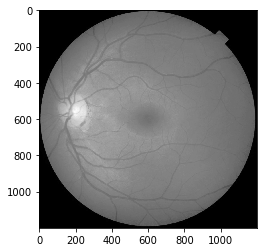

In [46]:
plt.imshow(matched, cmap='gray')
plt.show()